# Titanic Data Evaluation

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.stats.api as sms
from scipy import stats

filename = 'titanic-data.csv'

df = pd.read_csv(filename)

In [44]:
def isChild(x):
    if x > 18:
        return True
    else:
        return False
df["IsChild"] = pd.Series(df["Age"].apply(isChild), index=df.index)

## Plots ##

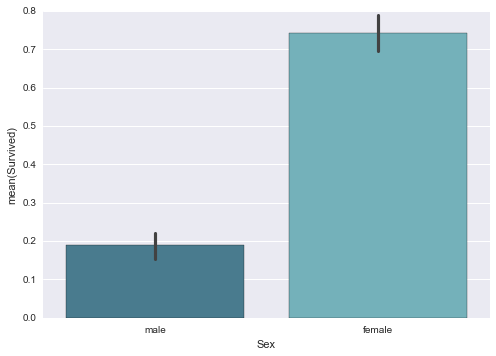

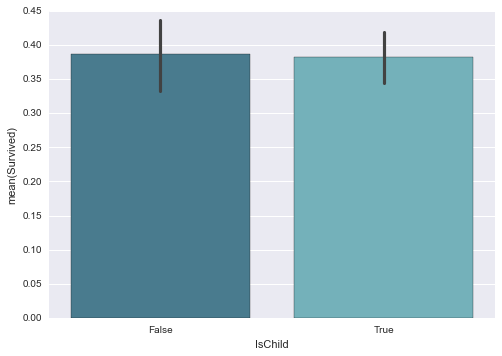

In [45]:
%matplotlib inline

sns.set(style="darkgrid")
sns.barplot(data=df,x="Sex",y="Survived", palette="GnBu_d")
sns.plt.show()
sns.barplot(data=df,x="IsChild",y="Survived", palette="GnBu_d")
sns.plt.show()

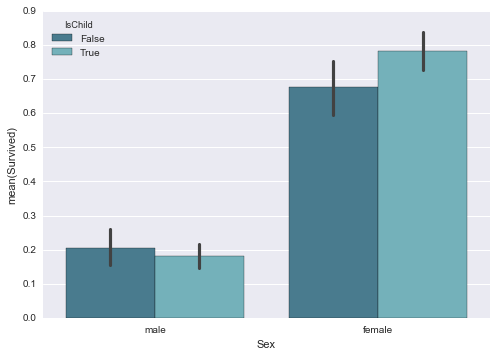

In [46]:
sns.barplot(data=df, x="Sex", y="Survived", hue="IsChild", palette="GnBu_d")

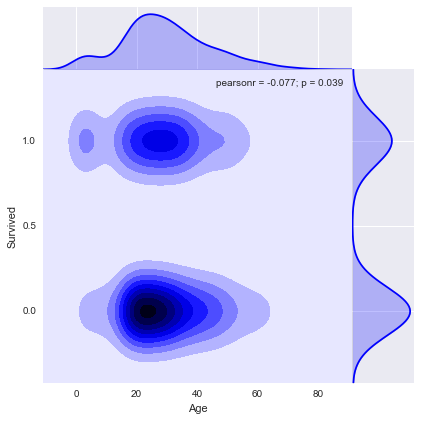

In [47]:

sns.jointplot("Age", "Survived", data=df,
                   kind="kde", space=0, color="b")

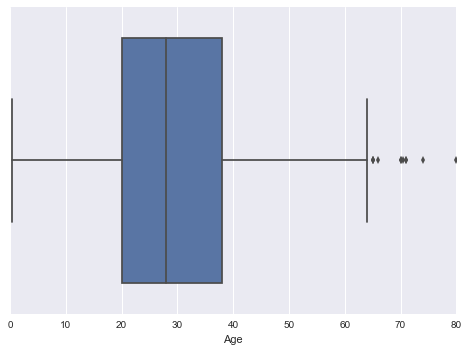

In [48]:
sns.boxplot(df.Age)

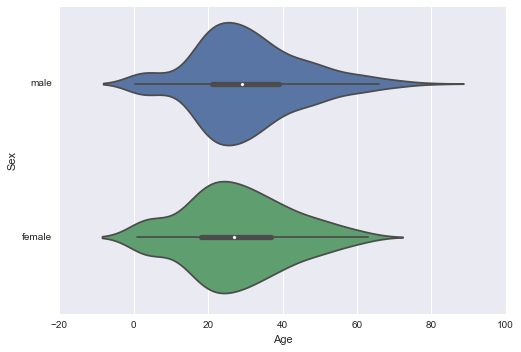

In [49]:
sns.violinplot(df.Age,df.Sex)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000E4136D8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000010EDC9E8>]], dtype=object)

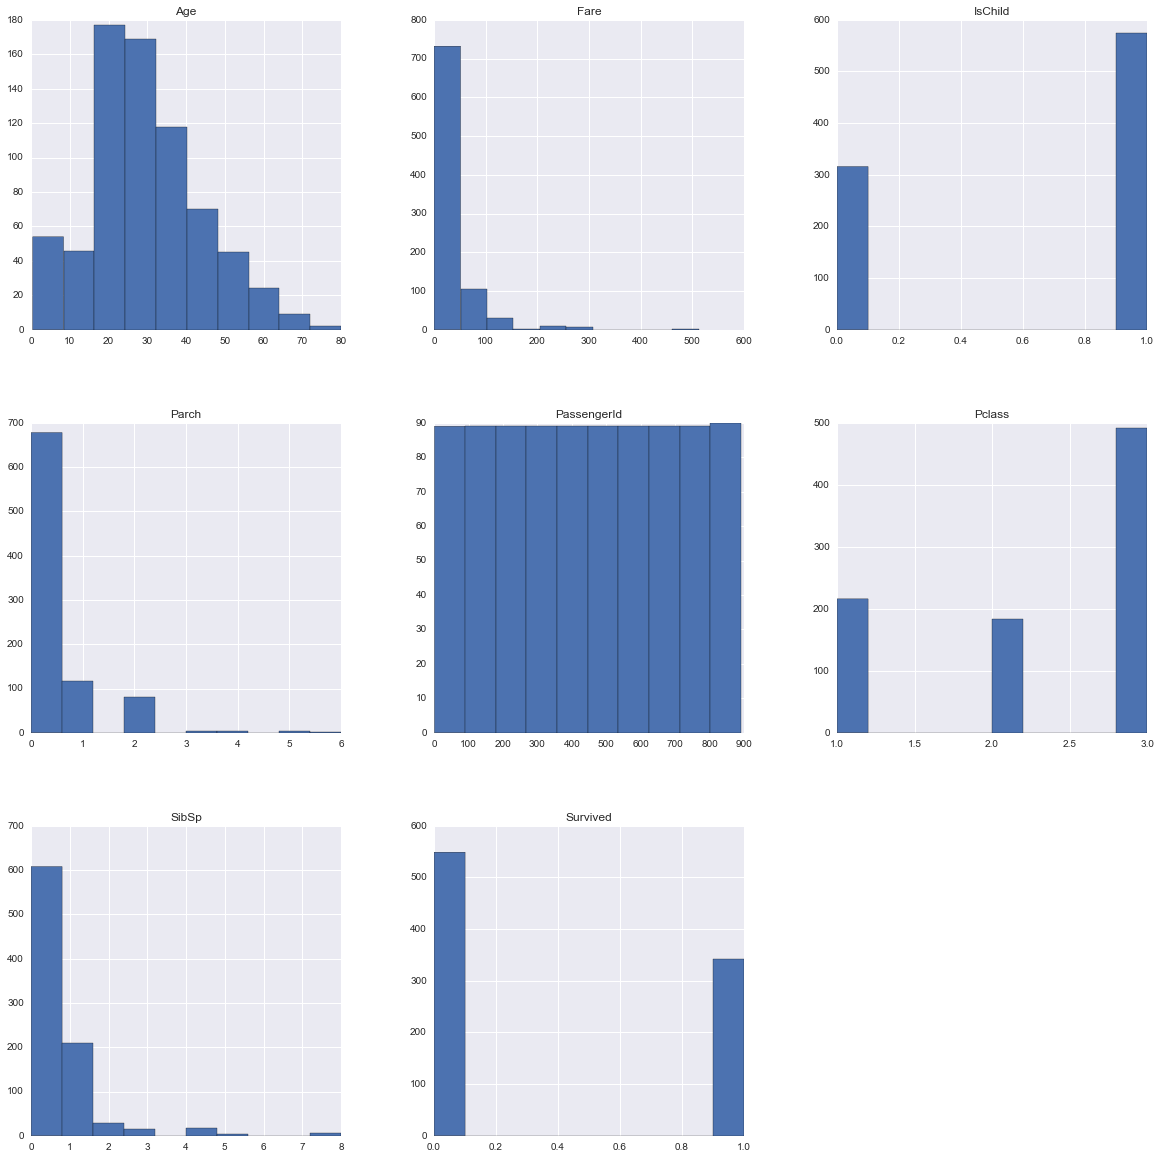

In [11]:
df.hist(figsize=(20,20))

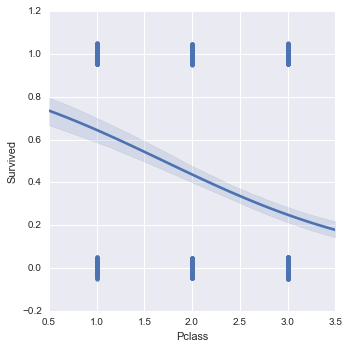

In [51]:
sns.lmplot(x="Pclass", y="Survived", data=df, logistic=True, y_jitter=.05, fit_reg=True) 